In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/car-price-details/car data.csv
/kaggle/input/car-price-details/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/car-price-details/Car details v3.csv


In [2]:
cars_df=pd.read_csv("/kaggle/input/car-price-details/CAR DETAILS FROM CAR DEKHO.csv")
cars_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


**Exploratory Information About Dataset**

In [3]:
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


**Here is the row count and objet datatype of column**

In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


**Here is the mean value,std deviation,maxima,minima of numerical columns in dataset**

In [5]:
cars_df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


**Here is the correlation of columns in dataset**

In [6]:
cars_df.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


**Here is if there are null values in columns**

In [7]:
cars_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

**Here are the total columns in dataset**

In [8]:
cars_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

**Here are the unique values in column name "name"**

In [9]:
"""
    Method Name: apply unique function
    Description: Here we applied the unique function to find unique names of cars
    Output: All cars name
    On Failure: Raise Exception
    Written By: Aniruddha Kawarase
    Version: 2.0
    Revisions: None
    """
cars_df["name"].unique(),cars_df["name"].nunique()

(array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
        'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
        'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
        'Hyundai i20 Magna 1.4 CRDi'], dtype=object),
 1491)

**Here are the lambda and split function**

In [10]:
"""
    Method Name: apply lambda and split function
    Description: Here we applied the lambda function and split function to seperate the specific name of cars and
                 saved in new variable "name_2"
    Output: All cars name
    On Failure: Raise Exception
    Written By: Aniruddha Kawarase
    Version: 2.0
    Revisions: None
    """
cars_df["name_2"] = cars_df.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
cars_df['name_2'].head()

0     Maruti
1     Maruti
2    Hyundai
3     Datsun
4      Honda
Name: name_2, dtype: object

**Here is the value count of all cars**

In [11]:
cars_df.name_2.value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: name_2, dtype: int64

**Data visualization**

**Countplot of all cars**

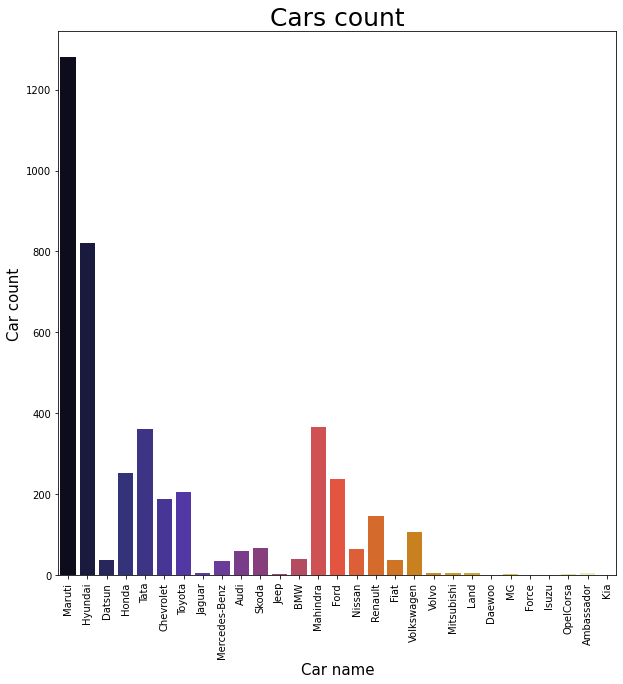

In [12]:
"""
    Method Name: count_plot
    Description: This is a method for ploting count_plot.We will plot count_plot with respect to given quantities.Taking dataset as
                 input from user 
    Output: count_plot of respective values
    On Failure: Raise Exception
    Written By: Aniruddha Kawarase
    Version: 2.0
    Revisions: None
    """
plt.figure(figsize=(10,10))
sns.countplot(data=cars_df,x="name_2",palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Car name",fontsize=15,color="black")
plt.ylabel("Car count",fontsize=15,color="black")
plt.title("Cars count",fontsize=25)
plt.show()

In [13]:
cars_df.year.value_counts()

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

**Countplot of all years**

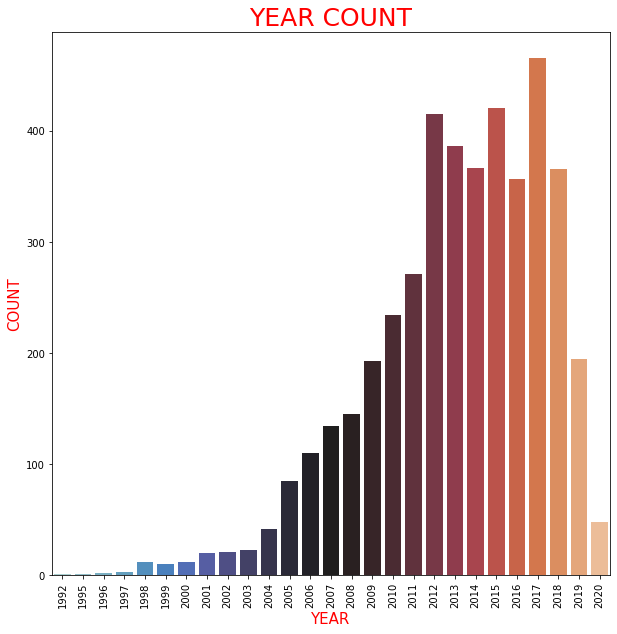

In [14]:
"""
    Method Name: count_plot
    Description: This is a method for ploting count_plot.We will plot count_plot with respect to given quantities.Taking dataset as
                 input from user 
    Output: count_plot of respective values
    On Failure: Raise Exception
    Written By: Aniruddha Kawarase
    Version: 2.0
    Revisions: None
    """
plt.figure(figsize=(10,10))
sns.countplot(data=cars_df,x="year",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("YEAR",fontsize=15,color="RED")
plt.ylabel("COUNT",fontsize=15,color="RED")
plt.title("YEAR COUNT",fontsize=25,color="RED")
plt.show()


**Pie chart of top 5 cars**

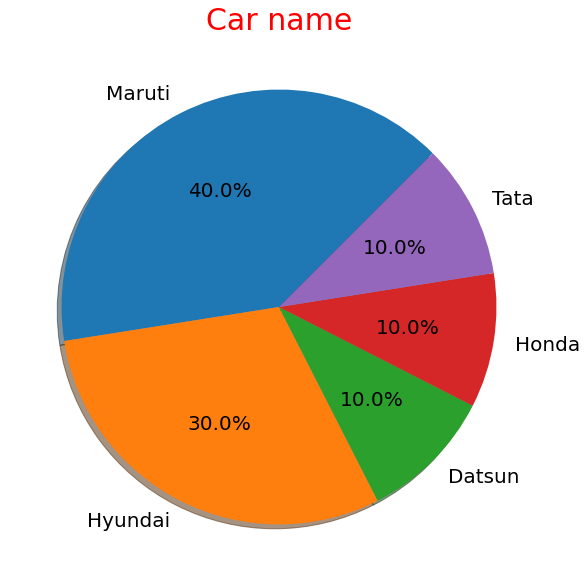

In [15]:
"""
    Method Name: pie_chart
    Description: This is a method for ploting pie chart.We will plot pie chart with respect to given quantities.Taking dataset as
                 input from user 
    Output: pie chart of respective values
    On Failure: Raise Exception
    Written By: Aniruddha Kawarase
    Version: 2.0
    Revisions: None
    """
labels = cars_df["name_2"][:10].value_counts().index
sizes = cars_df["name_2"][:10].value_counts()
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=True, startangle=45,textprops={'fontsize':20})
plt.title('Car name',color = 'red',fontsize = 30)
plt.show()

**Piechart of car sell of particular year**

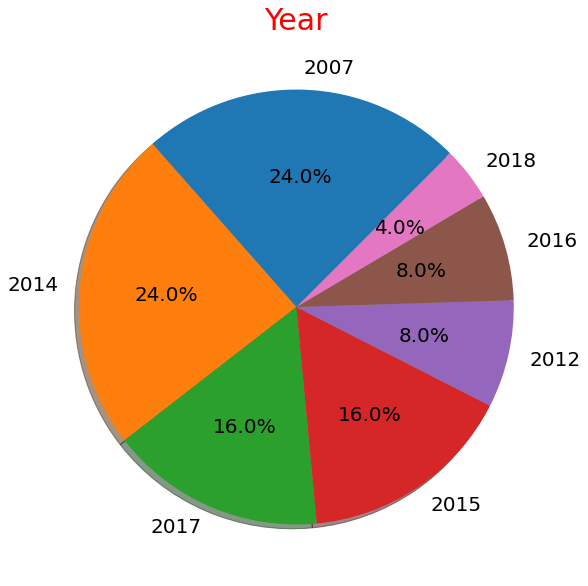

In [16]:
"""
    Method Name: pie_chart
    Description: This is a method for ploting pie chart.We will plot pie chart with respect to given quantities.Taking dataset as
                 input from user 
    Output: pie chart of respective values
    On Failure: Raise Exception
    Written By: Aniruddha Kawarase
    Version: 2.0
    Revisions: None
    """
labels = cars_df["year"][:25].value_counts().index
sizes = cars_df["year"][:25].value_counts()
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=True, startangle=45,textprops={'fontsize':20})
plt.title('Year',color = 'red',fontsize = 30)
plt.show()


**Heatmap of correlation between years,selling_price,km_driven**

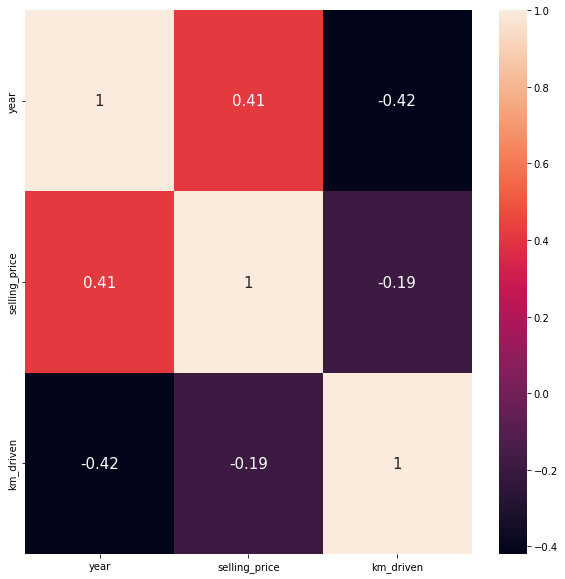

In [17]:
"""
    Method Name: Heatmap
    Description: This is a method for ploting heatmap.We will plot heatmap to find corelation of some quantities in dataset.Taking dataset as
                 input from user 
    Output: heatmap of respective values
    On Failure: Raise Exception
    Written By: Aniruddha Kawarase
    Version: 2.0
    Revisions: None
    """
plt.figure(figsize=(10,10))
ax = sns.heatmap(cars_df.corr(), annot=True,annot_kws={'fontsize':15})

In [18]:
cars_df.seller_type.value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

**Countplot of sellercount**

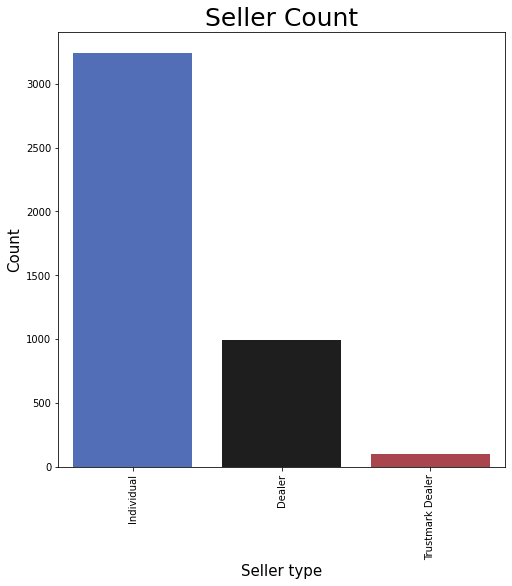

In [19]:
"""
    Method Name: count_plot
    Description: This is a method for ploting count_plot.We will plot count_plot with respect to given quantities.Taking dataset as
                 input from user 
    Output: count_plot of respective values
    On Failure: Raise Exception
    Written By: Aniruddha Kawarase
    Version: 2.0
    Revisions: None
    """
plt.figure(figsize=(8,8))
sns.countplot(data=cars_df,x="seller_type",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("Seller type",fontsize=15,color="black")
plt.ylabel("Count",fontsize=15,color="black")
plt.title("Seller Count",fontsize=25,color="black")
plt.show()


In [20]:
cars_df.owner.value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

Countplot of ownercount

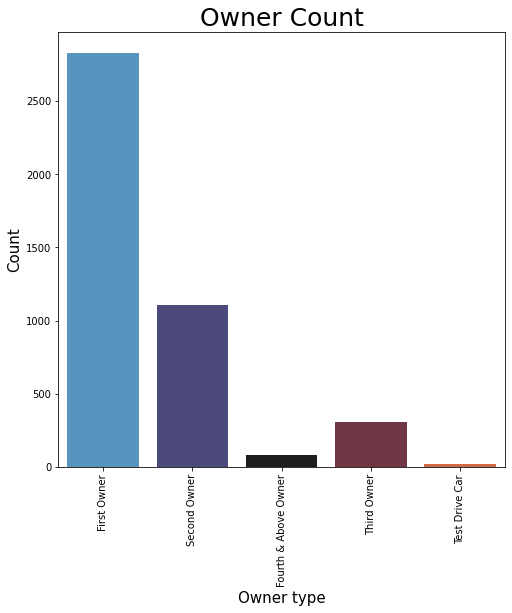

In [21]:
"""
    Method Name: count_plot
    Description: This is a method for ploting count_plot.We will plot count_plot with respect to given quantities.Taking dataset as
                 input from user 
    Output: count_plot of respective values
    On Failure: Raise Exception
    Written By: Aniruddha Kawarase
    Version: 2.0
    Revisions: None
    """
plt.figure(figsize=(8,8))
sns.countplot(data=cars_df,x="owner",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("Owner type",fontsize=15,color="black")
plt.ylabel("Count",fontsize=15,color="black")
plt.title("Owner Count",fontsize=25,color="black")
plt.show()

**Histplot of year**

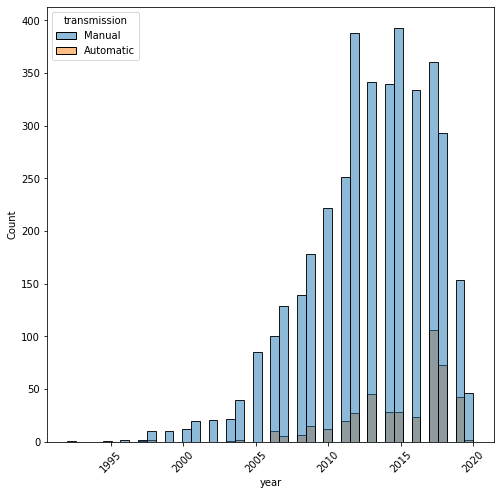

In [22]:
"""
    Method Name: Hist_plot
    Description: This is a method for ploting count_plot.We will plot hist_plot with respect to given quantities.Taking dataset as
                 input from user 
    Output: hist_plot of respective values
    On Failure: Raise Exception
    Written By: Aniruddha Kawarase
    Version: 2.0
    Revisions: None
    """
plt.figure(figsize=(8,8))
sns.histplot(data=cars_df, x="year", hue="transmission")
plt.xticks(rotation=45)
plt.show()

**Histplot of owner**

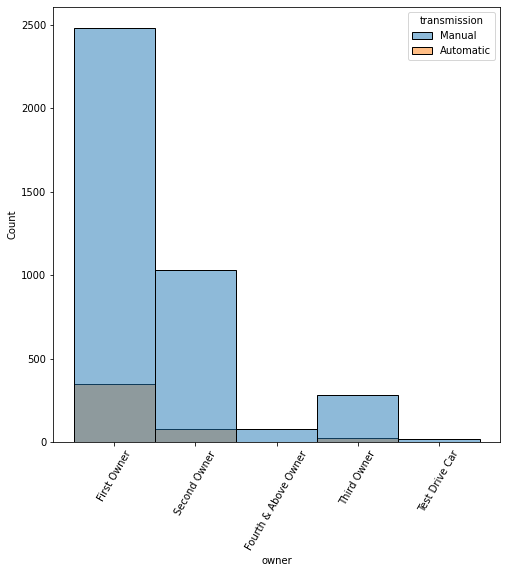

In [23]:
"""
    Method Name: Hist_plot
    Description: This is a method for ploting count_plot.We will plot hist_plot with respect to given quantities.Taking dataset as
                 input from user 
    Output: hist_plot of respective values
    On Failure: Raise Exception
    Written By: Aniruddha Kawarase
    Version: 2.0
    Revisions: None
    """
plt.figure(figsize=(8,8))
sns.histplot(data=cars_df, x="owner", hue="transmission")
plt.xticks(rotation=60)
plt.show()

**Histplot of seller_type**

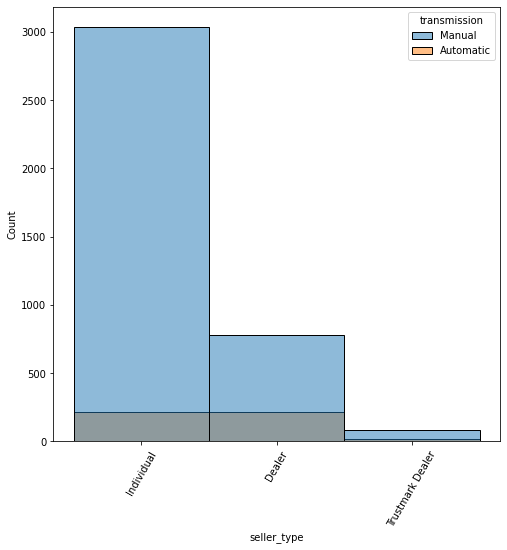

In [24]:
"""
    Method Name: Hist_plot
    Description: This is a method for ploting count_plot.We will plot hist_plot with respect to given quantities.Taking dataset as
                 input from user 
    Output: hist_plot of respective values
    On Failure: Raise Exception
    Written By: Aniruddha Kawarase
    Version: 2.0
    Revisions: None
    """
plt.figure(figsize=(8,8))
sns.histplot(data=cars_df, x="seller_type", hue="transmission")
plt.xticks(rotation=60)
plt.show()

**Boxplot of all cars to find outliers**

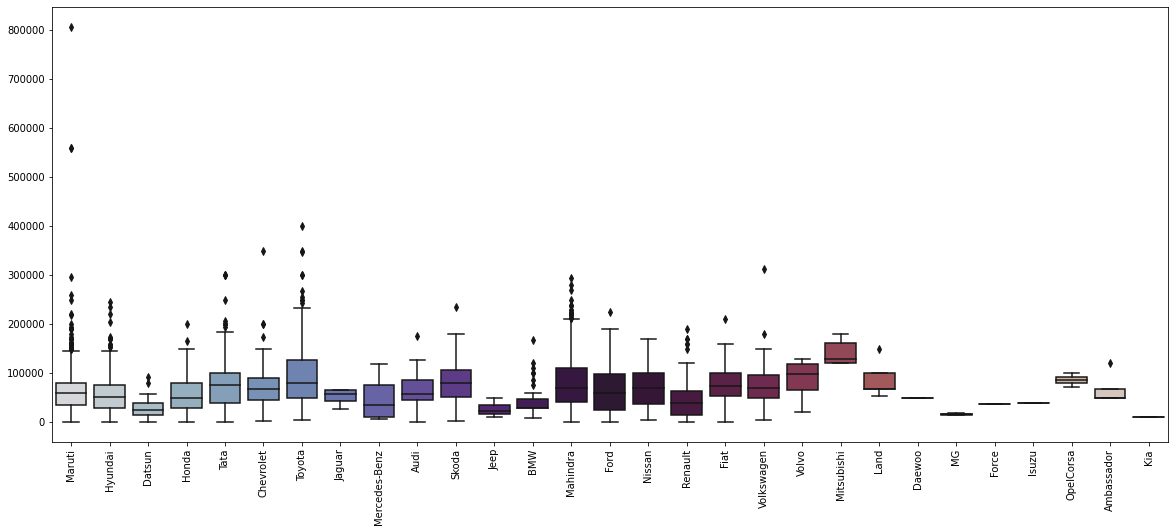

In [25]:
"""
    Method Name: Find_Outliers
    Description: This is a outliers finding method.we will calculate the outlier data points using the statistical
                 method called interquartile range (IQR).Here we check whter outliers are within range of Q1(25% of data)
                 and Q2(75% of data) and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1). 
    Output: number of outliers in dataset
    On Failure: Raise Exception
    Written By: Aniruddha KAwarase
    Version: 2.0
    Revisions: None
    """
f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=cars_df["name_2"].values, y = cars_df["km_driven"].values,palette="twilight",ax=ax)
plt.xticks(rotation=90)
plt.show()

Piechart of car sell of particular year